In [128]:
!pip install tensorflow-cpu

  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached scipy-1.4.1-cp38-cp38-win_amd64.whl (31.0 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_auth_oauthlib-0.4.1-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached Markdown-3.2.2-py3-none-any.whl (88 kB)
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0

In [129]:
import tensorflow as tf

In [130]:
print(tf.__version__)

2.3.0


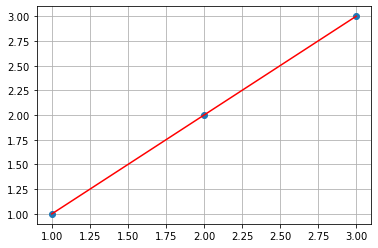

In [131]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

x = np.array([1,2,3])
y = np.array([1,2,3])

plt.plot(x,y, 'o' )
plt.plot(x,y, 'r-' )

plt.grid(True)
plt.show()

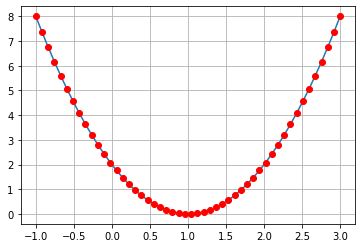

In [138]:
import numpy as np   
import matplotlib.pyplot as plt

x = 2
y = 2
b = 0

w = np.linspace(-1, 3, 50)
j = np.zeros(len(w))

for i in range(len(w)):
    y_hat = w[i]*x+b
    j[i] = 0.5*(y_hat - y)**2

plt.plot(w, j)
plt.plot(w, j, 'ro')
plt.grid(True)
plt.show()

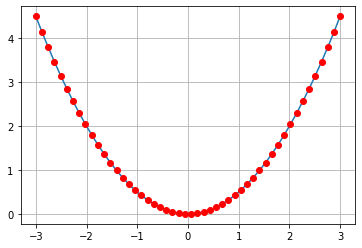

In [140]:
import numpy as np   
import matplotlib.pyplot as plt

x = 2
y = 2
w = 1

b = np.linspace(-3, 3, 50)
j = np.zeros(len(b))

for i in range(len(b)):
    y_hat = w*x+b[i]
    j[i] = 0.5*(y_hat - y)**2

plt.plot(b, j)
plt.plot(b, j, 'ro')
plt.grid(True)
plt.show()

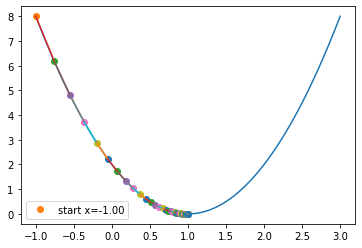

In [150]:

import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

# simple function to demo step size
def f(x) : # A parabola
    f = 0.5*(2-x*2)**2
    return f
def Df(x) : # The derivative (gradient)
    Df = 2*(2-x*2)
    return Df
def xp1(x,alpha) : # update
    xp1 = x + alpha * Df(x)
    return xp1

def plot_steps( guess, alpha, nsteps) :
    fig, ax = plt.subplots()
    x = np.linspace(-1,3,100)
    ax.plot(x, f(x))
    x = guess
    ax.plot(x,f(x), 'o', label='start x=%.2f' %x )
    for i in range(nsteps):
        xold = x
        x = xp1(x,alpha)
        #ax.plot(x,f(x), 'o', label='x = %.2f' %x)
        ax.plot(x,f(x), 'o')
        ax.plot([xold,x],[f(xold),f(x)], '-')
    plt.legend()
    plt.show()
    
plot_steps( -1, 0.03, 50 )

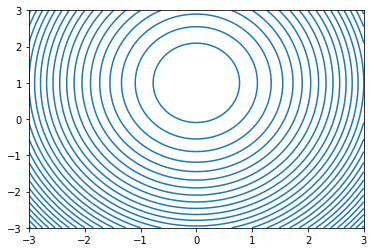

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# The function J
def J(a0, a1, x, y, m):
    ret=0
    for i in range(m):
        ret += 0.5*((a0 + a1*x[i]) - y[i] )**2
    return ret/m

x = np.linspace(-1,1,5)
y = x

#y = np.array([0.21378624, 1.97217916, 2.36737375, 5.13718724, 6.26470731])
a0 = np.linspace(-3,3,100)
a1 = np.linspace(-3,3,100)
aa0, aa1 = np.meshgrid(a0, a1)
plt.contour(aa0,aa1,J(aa0,aa1,x,y,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,0.3)])
plt.show()

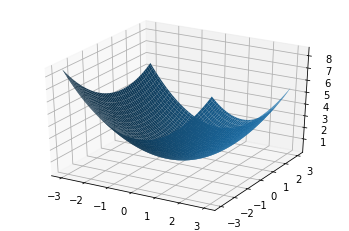

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

def pprint(arr):
    print("type:{}".format(type(arr)))
    print("shape: {}, dimension: {}, dtype:{}".format(arr.shape, arr.ndim, arr.dtype))
    print("Array's Data:\n", arr)

# The function J
def J(a0, a1, x, y, m):
    ret=0
    for i in range(m):
        ret += 0.5*((a0 + a1*x[i]) - y[i] )**2
    return ret/m

x = np.linspace(-1,1,5)
y = x
#y = np.array([0.21378624, 1.97217916, 2.36737375, 5.13718724, 6.26470731])
a0 = np.linspace(-3,3,100)
a1 = np.linspace(-3,3,100)

#pprint(x)
#pprint(y)
#pprint(a0)

#plt.plot(a1, J(a0,a1,x,y,m=len(x)) ) # set a0 to 0.1
aa0, aa1 = np.meshgrid(a0, a1)
ax.plot_surface(aa0, aa1, J(aa0,aa1,x,y,m=len(x)))

plt.show()

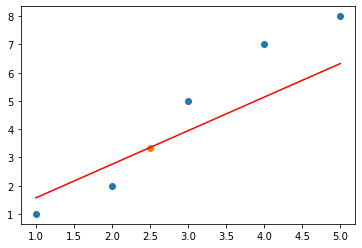

In [163]:
import matplotlib.pyplot as plt
import numpy as np

w=3
b=3
rate = 0.1
x = np.array([1,2,3,4,5])
y = np.array([1,2,5,7,8])

for i in range(50):
    for x_i, y_i in zip(x, y):
        y_hat = x_i*w + b
        err = y_hat - y_i
        w = w - rate*err*x_i
        b = b - rate*err

plt.scatter(x,y)
pt1 = (1., 1.*w+b)
pt2 = (5., 5.*w+b)
plt.plot( [pt1[0],pt2[0]],[pt1[1],pt2[1]], 'r-')
x_new = 2.5
y_pred = x_new*w + b
plt.scatter(x_new,y_pred)
plt.show()